In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import random

In [ ]:
with h5py.File('train.h5', 'r') as f:
  x_raw = f['x']
  y_raw = f['y']
  x = np.array(x_raw)
  y = np.array(y_raw)

In [ ]:
x = x.reshape(x.shape[0], x.shape[2])
y = y.astype(bool)

In [ ]:
x_pos = x[y]
x_neg = x[~y]

# Visualización de time series (random)

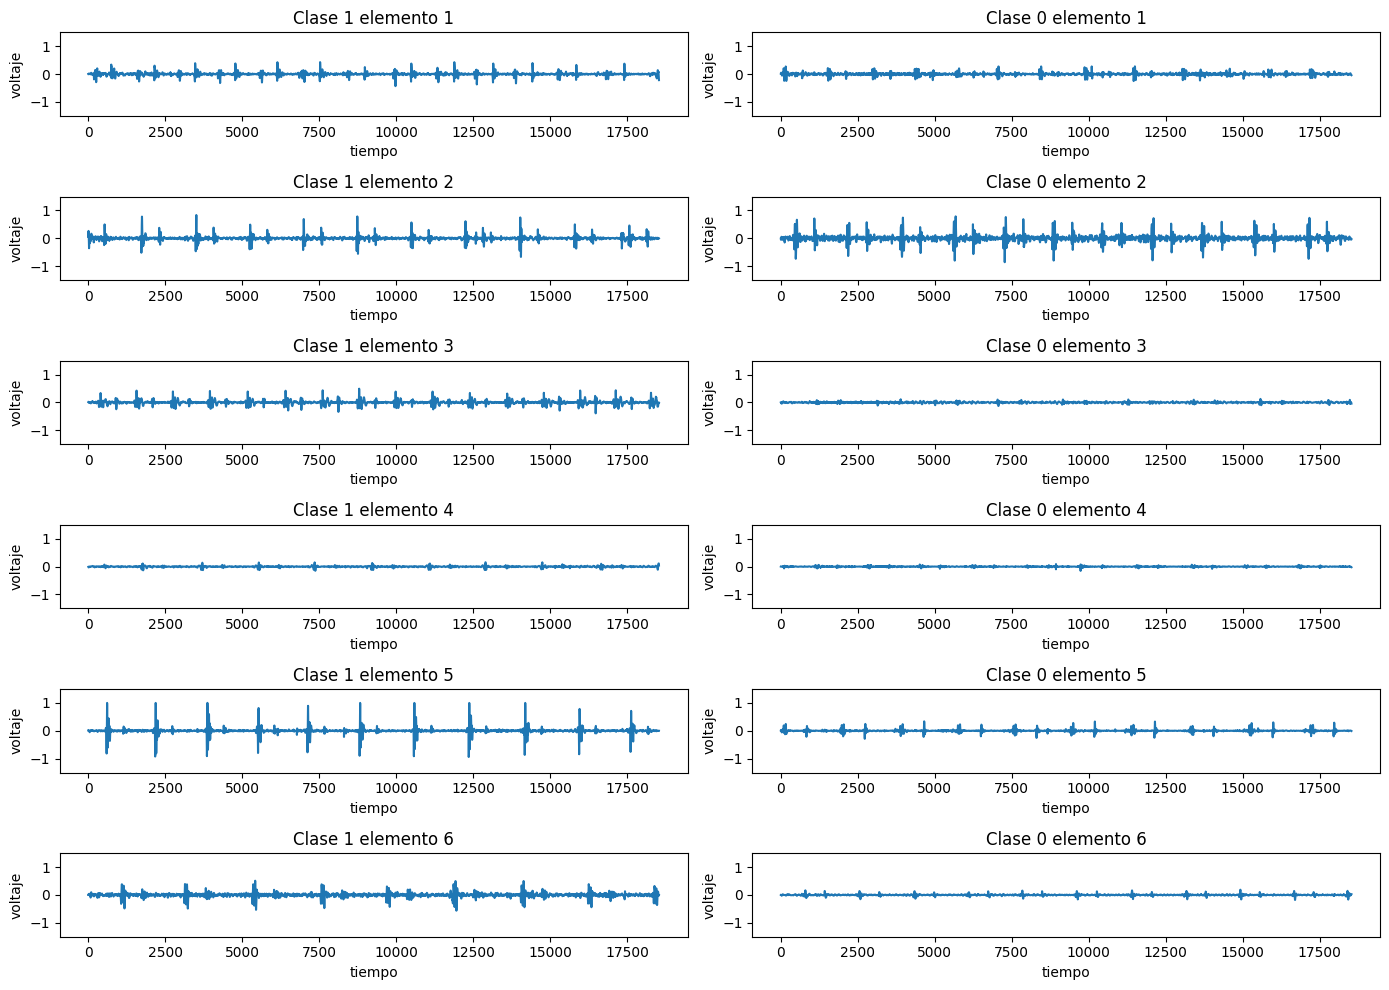

In [ ]:
num_plots = 6
fig, axes = plt.subplots(num_plots, 2, figsize=(14, 10))

random_indices_pos = random.sample(range(len(x_pos)), num_plots)
for i, index in enumerate(random_indices_pos):
    axes[i, 0].plot(x_pos[index])
    axes[i, 0].set_title(f"Clase 1 elemento {i + 1}")
    axes[i, 0].set_ylim(-1.5, 1.5)
    axes[i, 0].set_ylabel('voltaje')
    axes[i, 0].set_xlabel('tiempo')

random_indices_neg = random.sample(range(len(x_neg)), num_plots)
for i, index in enumerate(random_indices_neg):
    axes[i, 1].plot(x_neg[index])
    axes[i, 1].set_title(f"Clase 0 elemento {i + 1}")
    axes[i, 1].set_ylim(-1.5, 1.5)
    axes[i, 1].set_ylabel('voltaje')
    axes[i, 1].set_xlabel('tiempo')

plt.tight_layout()
plt.show()

# Estadísticas

In [ ]:
from scipy.stats import skew

stats_x_neg = [len(x_neg), len(x_neg) / len(x), np.mean(x_neg), np.min(x_neg), np.max(x_neg), np.std(x_neg),
              np.quantile(x_neg, 0.25), np.quantile(x_neg, 0.5), np.quantile(x_neg, 0.75), skew(x_neg.flatten())]
stats_x_pos = [len(x_pos), len(x_pos) / len(x), np.mean(x_pos), np.min(x_pos), np.max(x_pos), np.std(x_pos),
              np.quantile(x_pos, 0.25), np.quantile(x_pos, 0.5), np.quantile(x_pos, 0.75), skew(x_pos.flatten())]
df_stats = pd.DataFrame(
    data=[stats_x_neg, stats_x_pos],
    index=['0', '1'],
    columns=['count', '% of data','mean', 'min', 'max', 'std', '25%', '50%', '75%', 'skewness']
)

df_stats

,count,% of data,mean,min,max,std,25%,50%,75%,skewness
0,149,0.730392,-0.000031,-1.0,0.999969,0.077078,-0.010132,0.000061,0.010132,0.032591
1,55,0.269608,-0.000048,-1.0,0.999969,0.069507,-0.015106,0.000122,0.015198,0.281134
